In [1]:
import sys
if sys.platform == "darwin":  # michael's config
    # because Michael is using jupyter lab
    %load_ext lab_black
else:  # zade's config
    # because Zade is using jupyter notebook
    %load_ext nb_black

## Tasks

I have put several more utility functions into the coverage_utils module, have a look at all of them to understand what they do.

Update: I added the CoverageCalculator, making things much easier...
Update2: Initial investigations of results renders it necessary to create below new database for all three cases of fans, blotches and both areas considered in the union. I added a switch in the class that enables that kind of analysis. See below..
Next tasks are:

* [x] combine below code into a function with the name `calc_coverage(region_name)` that returns the pandas dataframe with the results (basically combining below cells into a function) but add a region_name column (same for all rows), in preparation for next task.
* [x] run a loop over all available region names (see below for how to get that list).
    * [ ] store each returned dataframe in a bucket list
    - Did the above inefficiently, still works (no bucket list)
    * [x] run each obsid three times, for `which` settings of 'both', 'fans' and 'blotches'
    * [x] combine the bucket into a larger dataframe that has all results
    * [x] save as CSV file using df.to_csv(...)
* [ ] Develep a plot function with the cells below, that conveniently reads the data out the above stored large dataframe and creates the plot, using the options as below.

# CoverageCalculator class

I wrote a class because it's much more efficient to keep the fans, blotches and metadata in memory and not read it in everytime. 
Keep that in mind for the future: When you need to read a data object often, it is more efficient to write a class that keeps that data in memory while you change a parameter (here: obsid) for different analyses.

This class reads in the general data files once and you can then use it in a loop by setting the obsid value as shown below.

In [48]:
import pandas as pd
import numpy as np

<IPython.core.display.Javascript object>

In [3]:
from coverage_utils import CoverageCalculator, get_obsids_for_region
from my_io import get_tilecoords, get_metadata, get_region_names

<IPython.core.display.Javascript object>

In [6]:
obsid = "ESP_011341_0980"

<IPython.core.display.Javascript object>

In [7]:
# the `which` setting is by default 'both'
cc = CoverageCalculator()

Reading fans and blotches in...
Done.
Reading metadata...
Done.
Note that obsid must be set to a string value before this works.


<IPython.core.display.Javascript object>

In [96]:
all_regions = get_region_names().roi_name.unique()

<IPython.core.display.Javascript object>

In [97]:
all_regions

array(['Macclesfield', 'unknown', 'Starburst', 'Manhattan_Classic',
       'Wellington', 'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo', 'Manhattan2'],
      dtype=object)

<IPython.core.display.Javascript object>

In [76]:
def calc_coverage(given_region, which="both"):
    bucket = []
    roi = given_region
    cc.which = which
    for MY in [29, 30]:
        print(f"Martian year: {MY}")
        for obsid in get_obsids_for_region(roi, MY):
            print(f"Calculating obsid {obsid}")
            d = {}
            d["obsid"] = obsid
            d["MY"] = MY
            cc.obsid = obsid
            d["fraction"] = cc.covered_fraction
            d["Ls"] = cc.Ls
            bucket.append(d)
    results = pd.DataFrame(bucket)
    results["region_name"] = given_region
    results["which"] = which
    return results

<IPython.core.display.Javascript object>

In [77]:
#gives calc_coverage results for all regions, which = 'both'
calc_region = [calc_coverage(region) for region in all_regions]

Martian year: 29
Calculating obsid ESP_012079_0945
Calculating obsid ESP_011407_0945
Calculating obsid ESP_011723_0945
Calculating obsid ESP_011934_0945
Calculating obsid ESP_012501_0945
Calculating obsid ESP_012290_0945
Calculating obsid ESP_011406_0945
Martian year: 30
Calculating obsid ESP_021494_0945
Calculating obsid ESP_020782_0945
Calculating obsid ESP_020716_0945
Calculating obsid ESP_020571_0945
Calculating obsid ESP_020294_0945
Calculating obsid ESP_020927_0945
Calculating obsid ESP_020242_0945
Martian year: 29
Calculating obsid ESP_012620_0975
Calculating obsid ESP_012277_0975
Calculating obsid ESP_012348_0975
Martian year: 30
Martian year: 29
Calculating obsid ESP_011697_0980
Calculating obsid ESP_011341_0980
Calculating obsid ESP_011842_0980
Calculating obsid ESP_011486_0980
Calculating obsid ESP_012607_0980
Calculating obsid ESP_012053_0980
Calculating obsid ESP_012264_0980
Martian year: 30
Calculating obsid ESP_020677_0980
Calculating obsid ESP_020756_0980
Calculating ob

Calculating obsid ESP_012671_0930
Calculating obsid ESP_012816_0930
Martian year: 30
Martian year: 29
Calculating obsid ESP_011413_0970
Martian year: 30
Martian year: 29
Martian year: 30
Calculating obsid ESP_022193_0950
Martian year: 29
Martian year: 30


<IPython.core.display.Javascript object>

In [79]:
#gives calc_coverage results for all regions, which = 'fans'
calc_region_fans = [
    calc_coverage(region, which="fans") for region in all_regions
]

Martian year: 29
Calculating obsid ESP_012079_0945
Calculating obsid ESP_011407_0945
Calculating obsid ESP_011723_0945
Calculating obsid ESP_011934_0945
Calculating obsid ESP_012501_0945
Calculating obsid ESP_012290_0945
Calculating obsid ESP_011406_0945
Martian year: 30
Calculating obsid ESP_021494_0945
Calculating obsid ESP_020782_0945
Calculating obsid ESP_020716_0945
Calculating obsid ESP_020571_0945
Calculating obsid ESP_020294_0945
Calculating obsid ESP_020927_0945
Calculating obsid ESP_020242_0945
Martian year: 29
Calculating obsid ESP_012620_0975
Calculating obsid ESP_012277_0975
Calculating obsid ESP_012348_0975
Martian year: 30
Martian year: 29
Calculating obsid ESP_011697_0980
Calculating obsid ESP_011341_0980
Calculating obsid ESP_011842_0980
Calculating obsid ESP_011486_0980
Calculating obsid ESP_012607_0980
Calculating obsid ESP_012053_0980
Calculating obsid ESP_012264_0980
Martian year: 30
Calculating obsid ESP_020677_0980
Calculating obsid ESP_020756_0980
Calculating ob

Calculating obsid ESP_012671_0930
Calculating obsid ESP_012816_0930
Martian year: 30
Martian year: 29
Calculating obsid ESP_011413_0970
Martian year: 30
Martian year: 29
Martian year: 30
Calculating obsid ESP_022193_0950
Martian year: 29
Martian year: 30


<IPython.core.display.Javascript object>

In [80]:
#gives calc_coverage results for all regions, which = 'blotches'
calc_region_blotches = [
    calc_coverage(region, which="blotches") for region in all_regions
]

Martian year: 29
Calculating obsid ESP_012079_0945
Calculating obsid ESP_011407_0945
Calculating obsid ESP_011723_0945
Calculating obsid ESP_011934_0945
Calculating obsid ESP_012501_0945
Calculating obsid ESP_012290_0945
Calculating obsid ESP_011406_0945
Martian year: 30
Calculating obsid ESP_021494_0945
Calculating obsid ESP_020782_0945
Calculating obsid ESP_020716_0945
Calculating obsid ESP_020571_0945
Calculating obsid ESP_020294_0945
Calculating obsid ESP_020927_0945
Calculating obsid ESP_020242_0945
Martian year: 29
Calculating obsid ESP_012620_0975
Calculating obsid ESP_012277_0975
Calculating obsid ESP_012348_0975
Martian year: 30
Martian year: 29
Calculating obsid ESP_011697_0980
Calculating obsid ESP_011341_0980
Calculating obsid ESP_011842_0980
Calculating obsid ESP_011486_0980
Calculating obsid ESP_012607_0980
Calculating obsid ESP_012053_0980
Calculating obsid ESP_012264_0980
Martian year: 30
Calculating obsid ESP_020677_0980
Calculating obsid ESP_020756_0980
Calculating ob

Calculating obsid ESP_012671_0930
Calculating obsid ESP_012816_0930
Martian year: 30
Martian year: 29
Calculating obsid ESP_011413_0970
Martian year: 30
Martian year: 29
Martian year: 30
Calculating obsid ESP_022193_0950
Martian year: 29
Martian year: 30


<IPython.core.display.Javascript object>

In [82]:
calc_region[0].head()

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [83]:
calc_region_fans[0].head()

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29,0.088,ESP_012079_0945,Macclesfield,fans
1,183.727,29,0.046,ESP_011407_0945,Macclesfield,fans
2,198.040,29,0.047,ESP_011723_0945,Macclesfield,fans
3,207.892,29,0.126,ESP_011934_0945,Macclesfield,fans
4,235.282,29,0.097,ESP_012501_0945,Macclesfield,fans


<IPython.core.display.Javascript object>

In [84]:
calc_region_blotches[0].head()

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29,0.037,ESP_012079_0945,Macclesfield,blotches
1,183.727,29,0.029,ESP_011407_0945,Macclesfield,blotches
2,198.040,29,0.032,ESP_011723_0945,Macclesfield,blotches
3,207.892,29,0.057,ESP_011934_0945,Macclesfield,blotches
4,235.282,29,0.021,ESP_012501_0945,Macclesfield,blotches


<IPython.core.display.Javascript object>

In [57]:
#proper result but as a list, want as a dataframe.
calc_region

[         Ls  MY  fraction            obsid   region_name
 0   214.785  29     0.115  ESP_012079_0945  Macclesfield
 1   183.727  29     0.070  ESP_011407_0945  Macclesfield
 2   198.040  29     0.072  ESP_011723_0945  Macclesfield
 3   207.892  29     0.168  ESP_011934_0945  Macclesfield
 4   235.282  29     0.111  ESP_012501_0945  Macclesfield
 5   224.964  29     0.087  ESP_012290_0945  Macclesfield
 6   183.683  29     0.074  ESP_011406_0945  Macclesfield
 7   243.978  30     0.049  ESP_021494_0945  Macclesfield
 8   209.383  30     0.075  ESP_020782_0945  Macclesfield
 9   206.269  30     0.062  ESP_020716_0945  Macclesfield
 10  199.501  30     0.065  ESP_020571_0945  Macclesfield
 11  186.879  30     0.080  ESP_020294_0945  Macclesfield
 12  216.293  30     0.079  ESP_020927_0945  Macclesfield
 13  184.557  30     0.054  ESP_020242_0945  Macclesfield,
         Ls  MY  fraction            obsid region_name
 0  241.144  29     0.068  ESP_012620_0975     unknown
 1  224.333  29    

<IPython.core.display.Javascript object>

In [98]:
full_region_both = pd.concat(calc_region, sort=True)

<IPython.core.display.Javascript object>

In [99]:
full_region_fans = pd.concat(calc_region_fans, sort=True)

<IPython.core.display.Javascript object>

In [100]:
full_region_blotches = pd.concat(calc_region_blotches, sort=True)

<IPython.core.display.Javascript object>

In [102]:
# exactly what we want! But this is only for which='both', need with fans and blotches too
full_region_both.head(16)

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29.0,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29.0,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29.0,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29.0,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29.0,0.111,ESP_012501_0945,Macclesfield,both
5,224.964,29.0,0.087,ESP_012290_0945,Macclesfield,both
6,183.683,29.0,0.074,ESP_011406_0945,Macclesfield,both
7,243.978,30.0,0.049,ESP_021494_0945,Macclesfield,both
8,209.383,30.0,0.075,ESP_020782_0945,Macclesfield,both
9,206.269,30.0,0.062,ESP_020716_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [113]:
two_dfs = pd.concat([full_region_both, full_region_fans], sort=True)

<IPython.core.display.Javascript object>

In [114]:
two_dfs.head()

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29.0,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29.0,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29.0,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29.0,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29.0,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [124]:
# this is exactly what we wanted I think!
combined_frames = pd.concat([two_dfs, full_region_blotches], sort=True)

<IPython.core.display.Javascript object>

In [122]:
combined_frames.head(16)

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29.0,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29.0,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29.0,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29.0,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29.0,0.111,ESP_012501_0945,Macclesfield,both
5,224.964,29.0,0.087,ESP_012290_0945,Macclesfield,both
6,183.683,29.0,0.074,ESP_011406_0945,Macclesfield,both
7,243.978,30.0,0.049,ESP_021494_0945,Macclesfield,both
8,209.383,30.0,0.075,ESP_020782_0945,Macclesfield,both
9,206.269,30.0,0.062,ESP_020716_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [123]:
combined_frames.iloc[0]

Ls                     214.785
MY                          29
fraction                 0.115
obsid          ESP_012079_0945
region_name       Macclesfield
which                     both
Name: 0, dtype: object

<IPython.core.display.Javascript object>

In [144]:
combined_frames.to_csv("final_df.csv", index=False)

<IPython.core.display.Javascript object>

In [50]:
calc_coverage("ithaca", which="blotches")

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


,Ls,MY,fraction,obsid,region_name
0,207.751,29,0.144,ESP_011931_0945,ithaca
1,214.020,29,0.154,ESP_012063_0945,ithaca
2,181.205,29,0.044,ESP_011350_0945,ithaca
3,214.641,29,0.156,ESP_012076_0945,ithaca
4,242.279,29,0.163,ESP_012643_0945,ithaca
5,252.710,29,0.132,ESP_012854_0945,ithaca
6,181.249,29,0.019,ESP_011351_0945,ithaca
7,183.594,29,0.016,ESP_011404_0945,ithaca
8,183.549,29,0.015,ESP_011403_0945,ithaca
9,252.907,29,0.150,ESP_012858_0855,ithaca


<IPython.core.display.Javascript object>

In [40]:
calc_coverage("ithaca", which="fans")

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


,Ls,MY,fraction,obsid,region_name
0,207.751,29,0.134,ESP_011931_0945,ithaca
1,214.020,29,0.113,ESP_012063_0945,ithaca
2,181.205,29,0.060,ESP_011350_0945,ithaca
3,214.641,29,0.109,ESP_012076_0945,ithaca
4,242.279,29,0.101,ESP_012643_0945,ithaca
5,252.710,29,0.141,ESP_012854_0945,ithaca
6,181.249,29,0.040,ESP_011351_0945,ithaca
7,183.594,29,0.105,ESP_011404_0945,ithaca
8,183.549,29,0.080,ESP_011403_0945,ithaca
9,252.907,29,0.119,ESP_012858_0855,ithaca


<IPython.core.display.Javascript object>

In [37]:
calc_coverage("ithaca")

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


,Ls,MY,fraction,obsid,region_name
0,207.751,29,0.225,ESP_011931_0945,ithaca
1,214.020,29,0.212,ESP_012063_0945,ithaca
2,181.205,29,0.091,ESP_011350_0945,ithaca
3,214.641,29,0.210,ESP_012076_0945,ithaca
4,242.279,29,0.212,ESP_012643_0945,ithaca
5,252.710,29,0.229,ESP_012854_0945,ithaca
6,181.249,29,0.056,ESP_011351_0945,ithaca
7,183.594,29,0.116,ESP_011404_0945,ithaca
8,183.549,29,0.088,ESP_011403_0945,ithaca
9,252.907,29,0.225,ESP_012858_0855,ithaca


<IPython.core.display.Javascript object>

In [10]:
cc.which

'both'

<IPython.core.display.Javascript object>

In [11]:
cc.obsid = "ESP_012079_0945"

<IPython.core.display.Javascript object>

In [131]:
cc.covered_fraction

0.115

In [132]:
cc.which = "fans"

In [133]:
cc.covered_fraction

0.088

In [134]:
cc.which = "blotches"

In [135]:
cc.covered_fraction

0.037

There's also the union itself and it's area, in case you need it:

In [136]:
cc.union.area

8091883.081637692

And the Ls value for the current obsid:

In [137]:
cc.Ls

214.785

# Region of Interest names

I added also a function to give you the list of obsids for a region name.

In [15]:
obsids = get_obsids_for_region("ithaca")
obsids

124    ESP_011931_0945
125    ESP_012063_0945
126    ESP_020357_0950
127    ESP_011350_0945
128    ESP_020476_0950
129    ESP_021491_0950
130    ESP_020779_0950
131    ESP_012076_0945
132    ESP_012643_0945
133    ESP_020146_0950
134    ESP_012854_0945
135    ESP_011351_0945
136    ESP_011404_0945
137    ESP_011403_0945
138    ESP_020568_0950
139    ESP_012858_0855
140    PSP_003822_0945
141    PSP_002675_0945
142    PSP_003466_0945
143    PSP_004033_0945
144    PSP_003309_0945
145    PSP_003453_0945
146    PSP_003308_0945
147    PSP_003677_0945
148    PSP_003310_0855
149    PSP_003176_0945
150    PSP_003796_0950
151    PSP_002622_0945
152    PSP_003730_0945
153    PSP_003193_0850
154    PSP_003756_0945
155    PSP_003954_0945
156    PSP_004178_0945
157    PSP_004891_0945
158    PSP_004666_0945
159    ESP_029548_0945
160    ESP_038040_0950
161    ESP_038462_0950
162    ESP_037842_0950
163    ESP_039359_0950
164    ESP_040216_0950
165    ESP_040189_0950
Name: obsid, dtype: object

<IPython.core.display.Javascript object>

## Restrict to a martian year

by using the MY parameter, you can restrict the obsid list to a specific Martian Year:

In [16]:
get_obsids_for_region("ithaca", 29)

124    ESP_011931_0945
125    ESP_012063_0945
127    ESP_011350_0945
131    ESP_012076_0945
132    ESP_012643_0945
134    ESP_012854_0945
135    ESP_011351_0945
136    ESP_011404_0945
137    ESP_011403_0945
139    ESP_012858_0855
Name: obsid, dtype: object

<IPython.core.display.Javascript object>

In [17]:
get_region_names().roi_name.unique()

array(['Macclesfield', 'unknown', 'Starburst', 'Manhattan_Classic',
       'Wellington', 'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo', 'Manhattan2'],
      dtype=object)

<IPython.core.display.Javascript object>

In [18]:
bucket = []
roi = "ithaca"
for MY in [29, 30]:
    print(f"Martian year: {MY}")
    for obsid in get_obsids_for_region(roi, MY):
        print(f"Calculating obsid {obsid}")
        d = {}
        d["obsid"] = obsid
        d["MY"] = MY
        cc.obsid = obsid
        d["fraction"] = cc.covered_fraction
        d["Ls"] = cc.Ls
        bucket.append(d)

Martian year: 29
Calculating obsid ESP_011931_0945
Calculating obsid ESP_012063_0945
Calculating obsid ESP_011350_0945
Calculating obsid ESP_012076_0945
Calculating obsid ESP_012643_0945
Calculating obsid ESP_012854_0945
Calculating obsid ESP_011351_0945
Calculating obsid ESP_011404_0945
Calculating obsid ESP_011403_0945
Calculating obsid ESP_012858_0855
Martian year: 30
Calculating obsid ESP_020357_0950
Calculating obsid ESP_020476_0950
Calculating obsid ESP_021491_0950
Calculating obsid ESP_020779_0950
Calculating obsid ESP_020146_0950
Calculating obsid ESP_020568_0950


<IPython.core.display.Javascript object>

In [21]:
results = pd.DataFrame(bucket)

<IPython.core.display.Javascript object>

In [22]:
results["region_name"] = "given_region"

<IPython.core.display.Javascript object>

In [33]:
results

,Ls,MY,fraction,obsid,region_name
0,207.751,29,0.225,ESP_011931_0945,given_region
1,214.020,29,0.212,ESP_012063_0945,given_region
2,181.205,29,0.091,ESP_011350_0945,given_region
3,214.641,29,0.210,ESP_012076_0945,given_region
4,242.279,29,0.212,ESP_012643_0945,given_region
5,252.710,29,0.229,ESP_012854_0945,given_region
6,181.249,29,0.056,ESP_011351_0945,given_region
7,183.594,29,0.116,ESP_011404_0945,given_region
8,183.549,29,0.088,ESP_011403_0945,given_region
9,252.907,29,0.225,ESP_012858_0855,given_region


<IPython.core.display.Javascript object>

In [108]:
import hvplot
import hvplot.pandas
from bokeh.resources import INLINE

In [109]:
# fix the xticks for better plot comparison
xticks = list(range(170, 301, 10))
xticks

[170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300]

In [110]:
savepath = Path(
    "/Users/klay6683/Dropbox/data/planet4/p4_analysis/coverage_plots"
)

In [111]:
plot = results.hvplot(
    x="Ls",
    y="fraction",
    by="MY",
    kind="scatter",
    title=roi,
    xlim=(170, 300),
    ylim=(-0.05, 0.5),
    grid=True,
    xticks=xticks,
    width=800,
    height=400,
)
# hvplot.show(plot)
for ext in ["png", "html"]:
    hvplot.save(plot, str(savepath / f"{roi}_coverage.{ext}"), resources=INLINE)

In [25]:
metadata = get_metadata()

In [26]:
metadata.columns

Index(['OBSERVATION_ID', 'IMAGE_CENTER_LATITUDE', 'IMAGE_CENTER_LONGITUDE',
       'SOLAR_LONGITUDE', 'START_TIME', 'map_scale', 'north_azimuth',
       '# of tiles'],
      dtype='object')

# Making our Plot

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<IPython.core.display.Javascript object>

In [145]:
# make sure our csv works
p_data = pd.read_csv("final_df.csv")

<IPython.core.display.Javascript object>

In [147]:
p_data.head()

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29.0,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29.0,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29.0,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29.0,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29.0,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [164]:
grp_both = p_data.groupby("which").get_group("both")

<IPython.core.display.Javascript object>

In [165]:
grp_fans = p_data.groupby("which").get_group("fans")

<IPython.core.display.Javascript object>

In [167]:
grp_blotches = p_data.groupby("which").get_group("blotches")

<IPython.core.display.Javascript object>

In [168]:
grp_both.head()

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29.0,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29.0,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29.0,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29.0,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29.0,0.111,ESP_012501_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [ ]:
#very nice for saving our plots eg at the end of the plotting write savefig("what_we_call_it.pdf")
from pylab import savefig

C:\Users\Zade Alfalah\AppData\Local\conda\conda\envs\py37\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'Fractional Coverage')

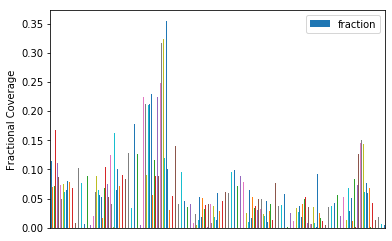

<IPython.core.display.Javascript object>

In [212]:
# shows a general view of the fractional coverage of both fans and blotches over time! neato.
# need to remove the fraction label, think its just a line to remove key or legend or whatever, look into tomorrow
grp_both.plot.bar(x="Ls", y="fraction")

# below lines to clean up the graph, comment out to see with every l_s value below (too messy to understand anyways)
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
plt.ylabel("Fractional Coverage")

In [183]:
# group 'both by region'
bbr = grp_both.groupby("region_name")

<IPython.core.display.Javascript object>

region_name
Albany                   AxesSubplot(0.125,0.125;0.775x0.755)
Atka                     AxesSubplot(0.125,0.125;0.775x0.755)
Bilbao                   AxesSubplot(0.125,0.125;0.775x0.755)
Binghamton               AxesSubplot(0.125,0.125;0.775x0.755)
BuenosAires              AxesSubplot(0.125,0.125;0.775x0.755)
Caterpillar              AxesSubplot(0.125,0.125;0.775x0.755)
Cortland                 AxesSubplot(0.125,0.125;0.775x0.755)
Geneseo                  AxesSubplot(0.125,0.125;0.775x0.755)
Giza                     AxesSubplot(0.125,0.125;0.775x0.755)
Halifax                  AxesSubplot(0.125,0.125;0.775x0.755)
Inca_City                AxesSubplot(0.125,0.125;0.775x0.755)
Inca_City_Ridges         AxesSubplot(0.125,0.125;0.775x0.755)
Ithaca                   AxesSubplot(0.125,0.125;0.775x0.755)
Macclesfield             AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan_Classic        AxesSubplot(0.125,0.125;0.775x0.755)
Manhattan_Cracks         AxesSubplot(0.125,0.125;0.775x0.7

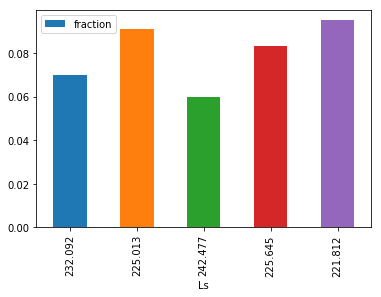

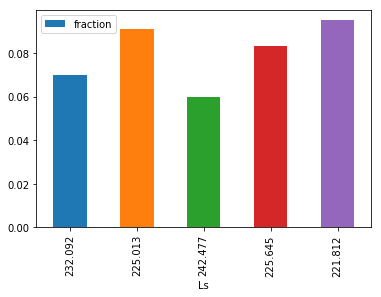

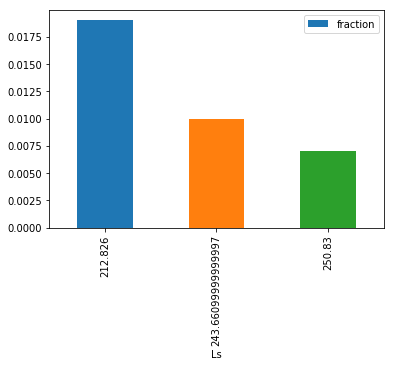

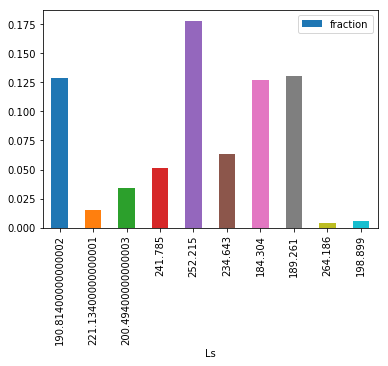

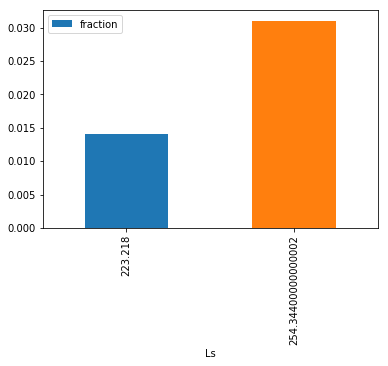

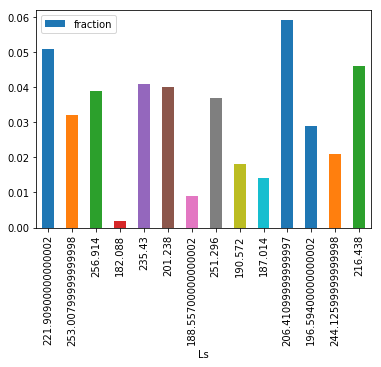

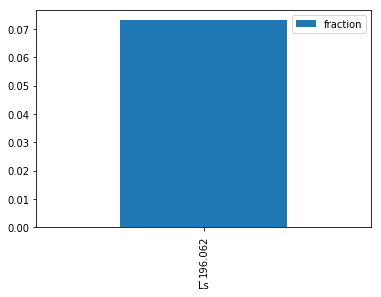

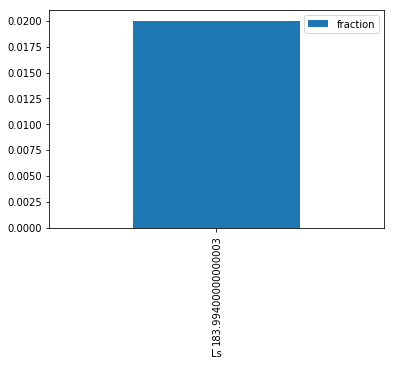

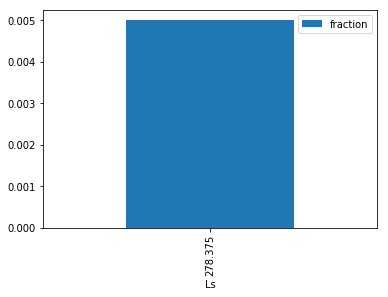

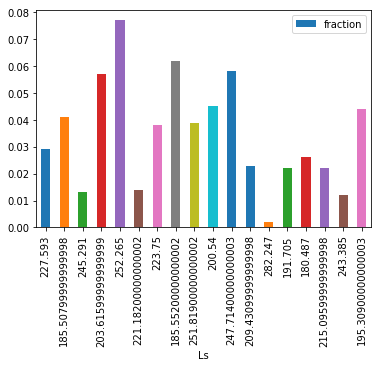

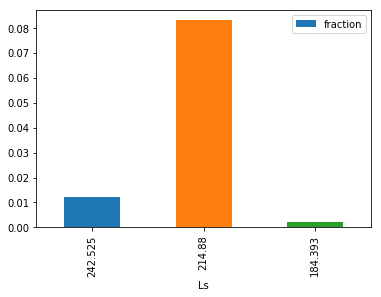

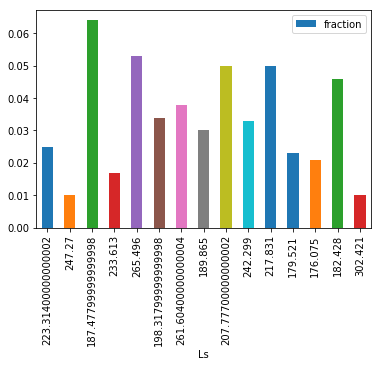

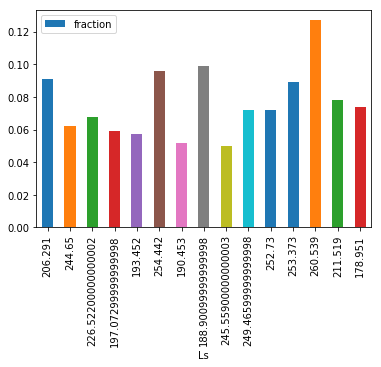

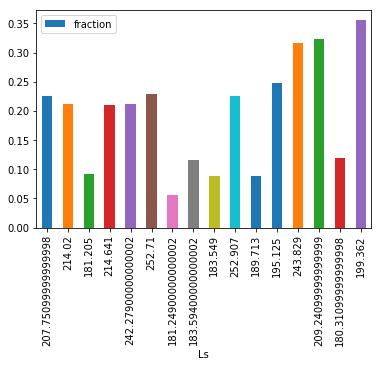

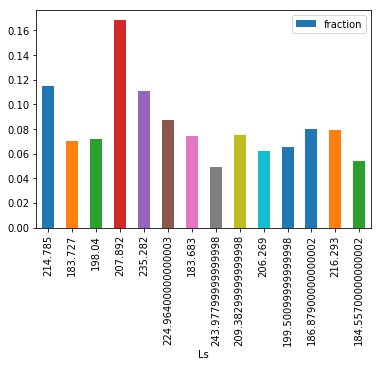

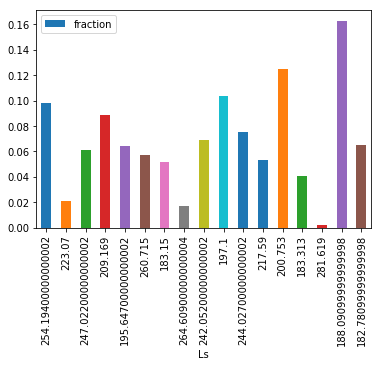

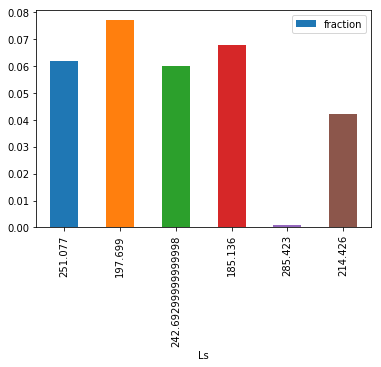

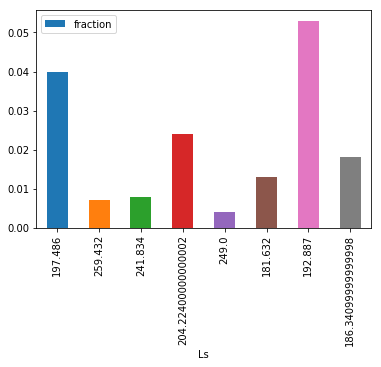

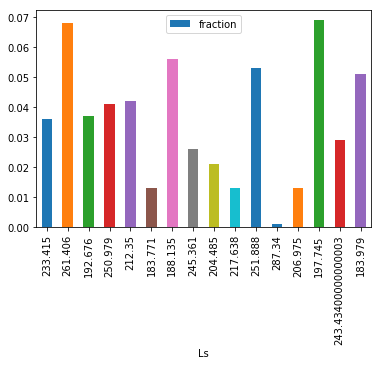

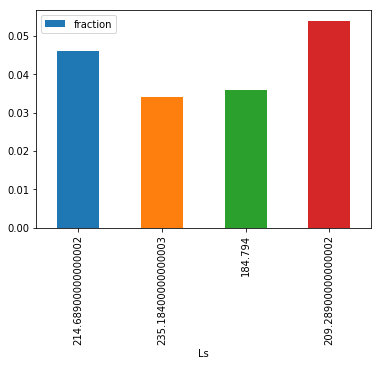

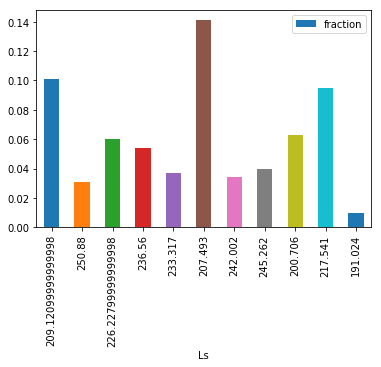

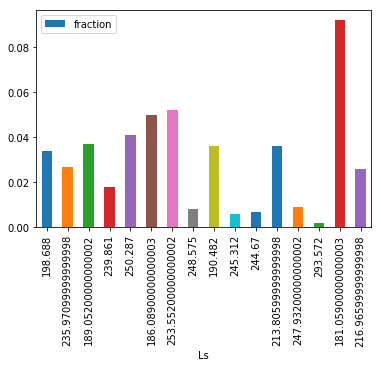

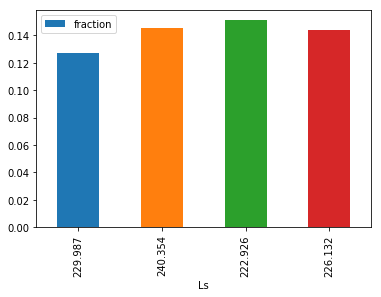

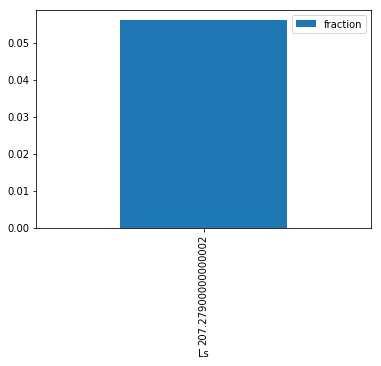

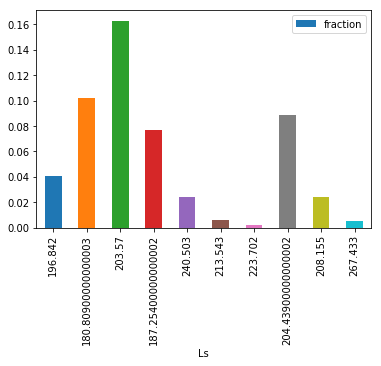

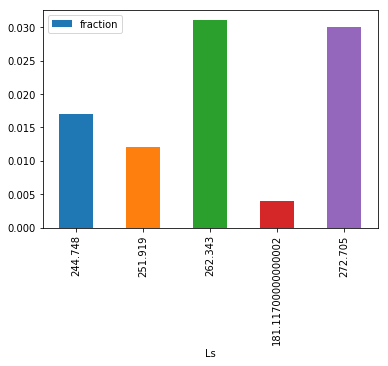

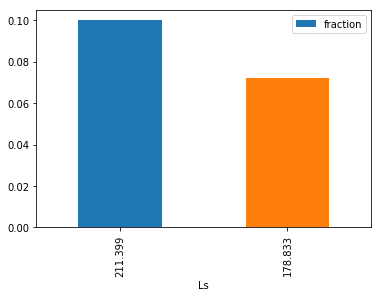

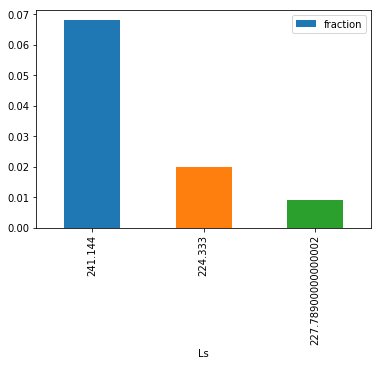

<IPython.core.display.Javascript object>

In [192]:
#gives the l_s vs fraction graph but by region, need to rewrite so that it displays region name as title.
bbr.plot.bar(x="Ls", y="fraction")

In [214]:
all_regions = get_region_names().roi_name.unique()

<IPython.core.display.Javascript object>

In [215]:
all_regions

array(['Macclesfield', 'unknown', 'Starburst', 'Manhattan_Classic',
       'Wellington', 'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo', 'Manhattan2'],
      dtype=object)

<IPython.core.display.Javascript object>

In [281]:
# remembering how to properly select dataframes
grp_both[grp_both["region_name"] == "Macclesfield"]

,Ls,MY,fraction,obsid,region_name,which
0,214.785,29.0,0.115,ESP_012079_0945,Macclesfield,both
1,183.727,29.0,0.070,ESP_011407_0945,Macclesfield,both
2,198.040,29.0,0.072,ESP_011723_0945,Macclesfield,both
3,207.892,29.0,0.168,ESP_011934_0945,Macclesfield,both
4,235.282,29.0,0.111,ESP_012501_0945,Macclesfield,both
5,224.964,29.0,0.087,ESP_012290_0945,Macclesfield,both
6,183.683,29.0,0.074,ESP_011406_0945,Macclesfield,both
7,243.978,30.0,0.049,ESP_021494_0945,Macclesfield,both
8,209.383,30.0,0.075,ESP_020782_0945,Macclesfield,both
9,206.269,30.0,0.062,ESP_020716_0945,Macclesfield,both


<IPython.core.display.Javascript object>

In [282]:
x = grp_both[grp_both["region_name"] == "Macclesfield"]

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Macclesfield')

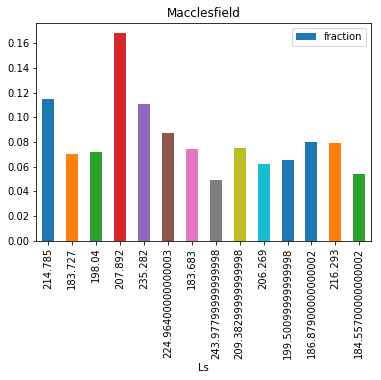

<IPython.core.display.Javascript object>

In [284]:
x.plot.bar(x="Ls", y="fraction")
plt.title("Macclesfield")

TypeError: Empty 'DataFrame': no numeric data to plot

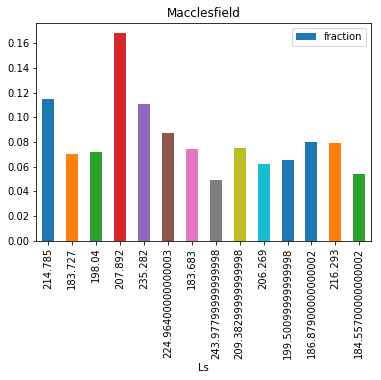

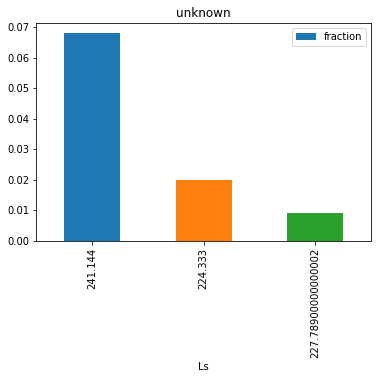

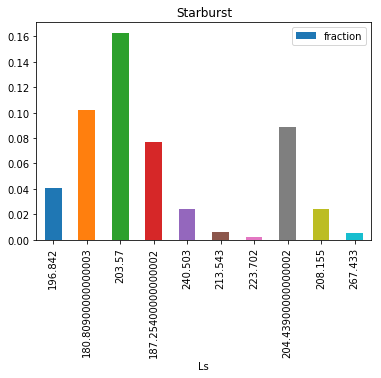

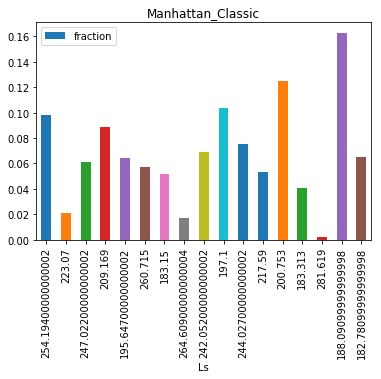

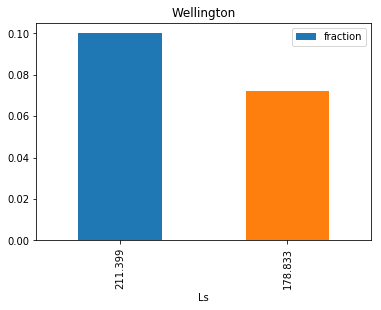

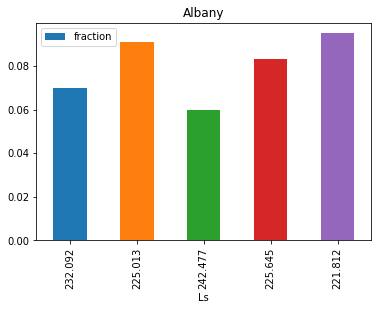

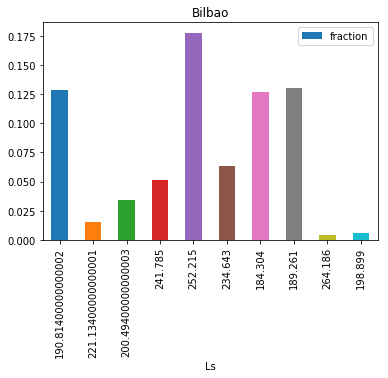

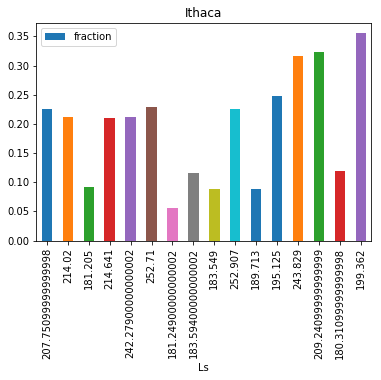

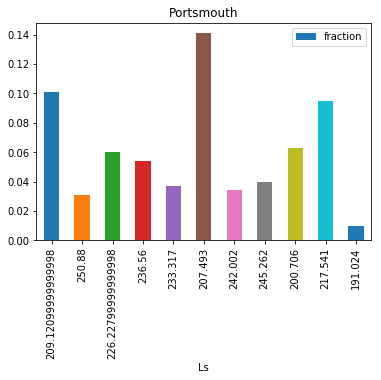

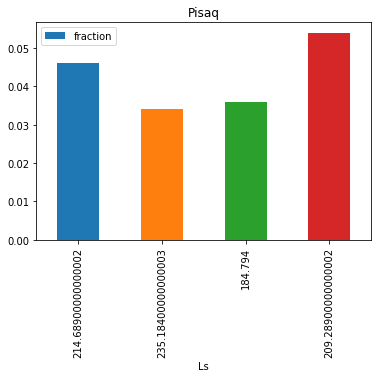

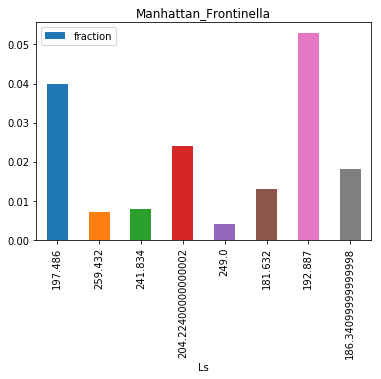

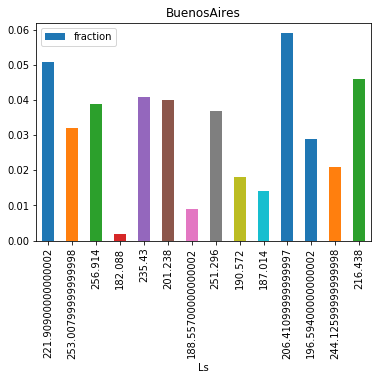

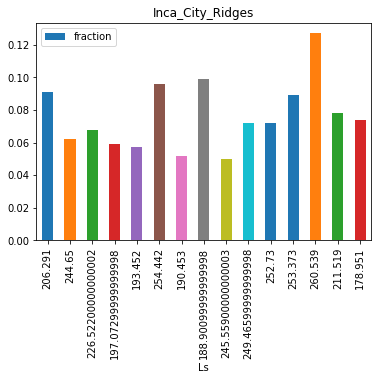

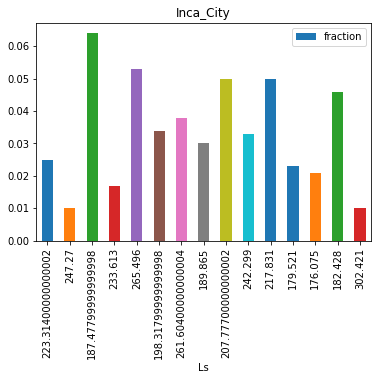

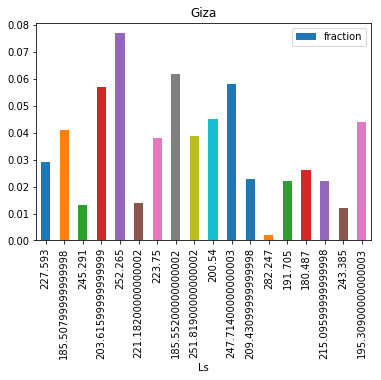

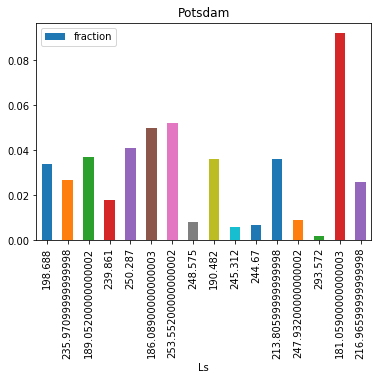

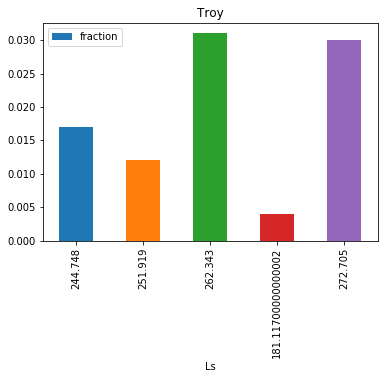

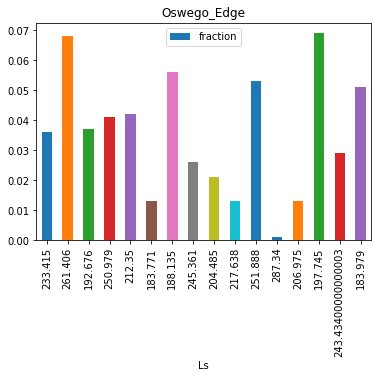

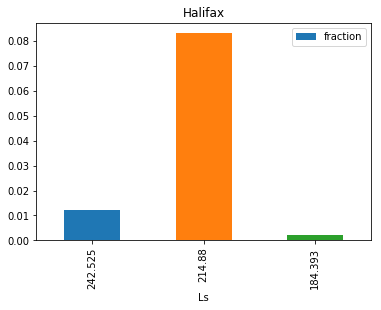

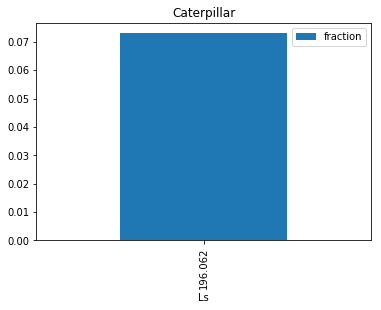

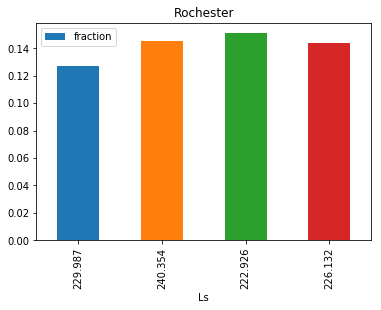

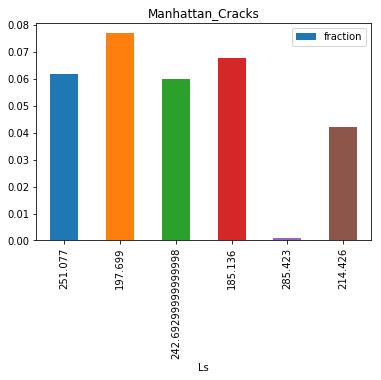

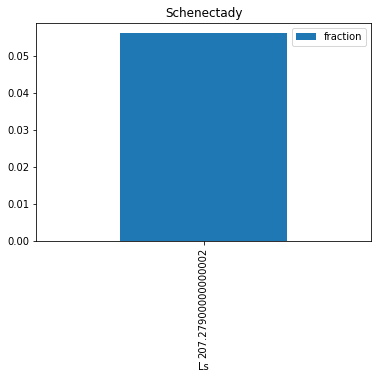

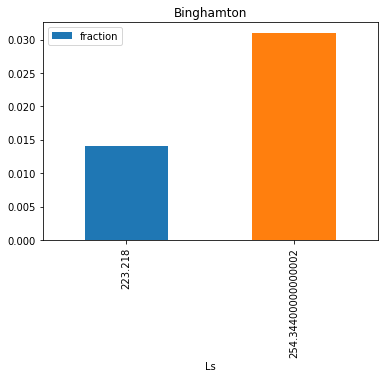

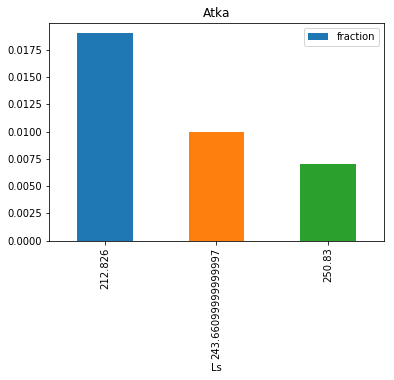

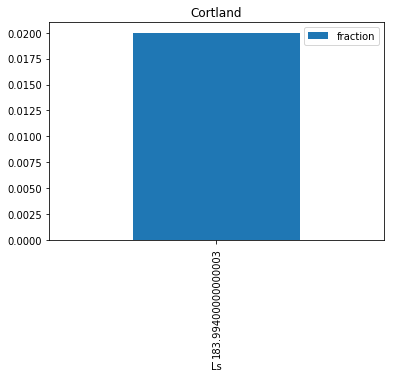

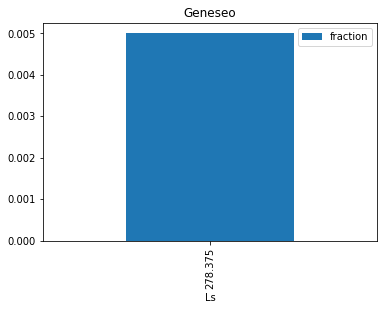

<IPython.core.display.Javascript object>

In [285]:
for region_s in all_regions:
    x = grp_both[grp_both["region_name"] == region_s]
    x.plot.bar(x="Ls", y="fraction")
    plt.title(region_s)